## Porto Seguro’s Safe Driver Prediction
In this notebook, we will take a first stab at the [Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) problem from Kaggle. The dataset has been downloaded to this directory.

In [1]:
# Basic Imports
%matplotlib inline

# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')

In [2]:
# Load Data
dtrain = pd.read_csv('train.csv')
dtrain.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


## Problem 1

In [3]:
# Part A
print "Dataset dimensions:", dtrain.shape

Dataset dimensions: (595212, 59)


In [4]:
# Part B
# Get Columns with '_cat' ending
allcols = dtrain.columns
catcols = []
for c in allcols:
    if c.endswith('_cat'):
        catcols.append(c)
        
# Find Unique in each category
print "Unique entries in cat features:"
for c in catcols:
    print '{}:\t {}'.format(c,dtrain[c].unique().shape[0])   

Unique entries in cat features:
ps_ind_02_cat:	 5
ps_ind_04_cat:	 3
ps_ind_05_cat:	 8
ps_car_01_cat:	 13
ps_car_02_cat:	 3
ps_car_03_cat:	 3
ps_car_04_cat:	 10
ps_car_05_cat:	 3
ps_car_06_cat:	 18
ps_car_07_cat:	 3
ps_car_08_cat:	 2
ps_car_09_cat:	 6
ps_car_10_cat:	 3
ps_car_11_cat:	 104


In [5]:
# Part C
## ToDo

## Problem 2

In [7]:
from sklearn.cross_validation import train_test_split

# Obtain Train & Validation Sets
features = dtrain.columns[2:]

x_data = dtrain[features].values
y_data = dtrain.target.values

x_train,x_test,y_train,y_test = train_test_split(
                                x_data,y_data,
                                test_size=0.2,
                                random_state=32)

print 'X train size:', x_train.shape
print 'Y train size:', y_train.shape
print ''
print 'X test size:', x_test.shape
print 'Y test size:', y_test.shape

X train size: (476169, 57)
Y train size: (476169,)

X test size: (119043, 57)
Y test size: (119043,)


### Deep Neural Network

In [12]:
# Keras Imports
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight

In [9]:
# IO Parameters
L1 = 100
L2 = 50
L3 = 20
num_feat = 57

In [16]:
# Models
model = Sequential()
model.add(Dense(units=L1,input_dim=57,name='L1',activation='relu'))
model.add(Dense(units=L2,name='L2',activation='relu'))
model.add(Dense(units=L3,name='L3',activation='relu'))
model.add(Dense(units=1,name='Classifier',activation='sigmoid'))

# Compile Model
# cweight = compute_class_weight('balanced',np.unique(y_train), y_train)
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 100)               5800      
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 20)                1020      
_________________________________________________________________
Classifier (Dense)           (None, 1)                 21        
Total params: 11,891
Trainable params: 11,891
Non-trainable params: 0
_________________________________________________________________


In [19]:
## Model Training
model.fit(x_train,y_train, epochs=20, batch_size=32)

Epoch 1/1
476169/476169 [==============================] - 38s - loss: 0.1551 - acc: 0.9636    


In [22]:
# Model Evaluation
from sklearn.metrics import accuracy_score, roc_curve

y_scrs = model.predict(x_test)
y_pred = y_scrs > 0.5
acc    = accuracy_score(y_test,y_pred)
print "Test Accuracy: {}".format(acc*100)

Test Accuracy:  96.3559386104


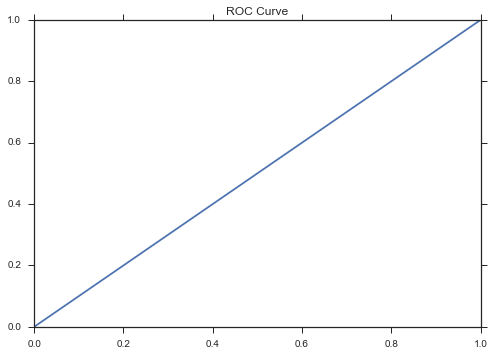

In [26]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.title('ROC Curve')